<a href="https://colab.research.google.com/github/seunghoonss/AI-HACKATHON/blob/main/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 세상에서 가장 쉬운 AI 이미지 생성 - Stable Diffusion

> 유튜브 [빵형의 개발도상국](https://www.youtube.com/@bbanghyong)

https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/

```
@misc{wood2022kerascv,
  title={KerasCV},
  author={Wood, Luke and Tan, Zhenyu and Ian, Stenbit and Zhu, Scott and Chollet, Fran\c{c}ois and others},
  year={2022},
  howpublished={\url{https://github.com/keras-team/keras-cv}},
}
```

In [1]:
!nvidia-smi

Wed Jan 11 04:18:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install --upgrade keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.8/615.8 KB 35.7 MB/s eta 0:00:00


In [3]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


## Stable Diffustion 모델 로드

In [4]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [5]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
        plt.tight_layout()

## 첫 번째 이미지 생성

> 우주인이 말을 타고 있는 사진

198180272/198180272 [==============================] - 2s 0us/step


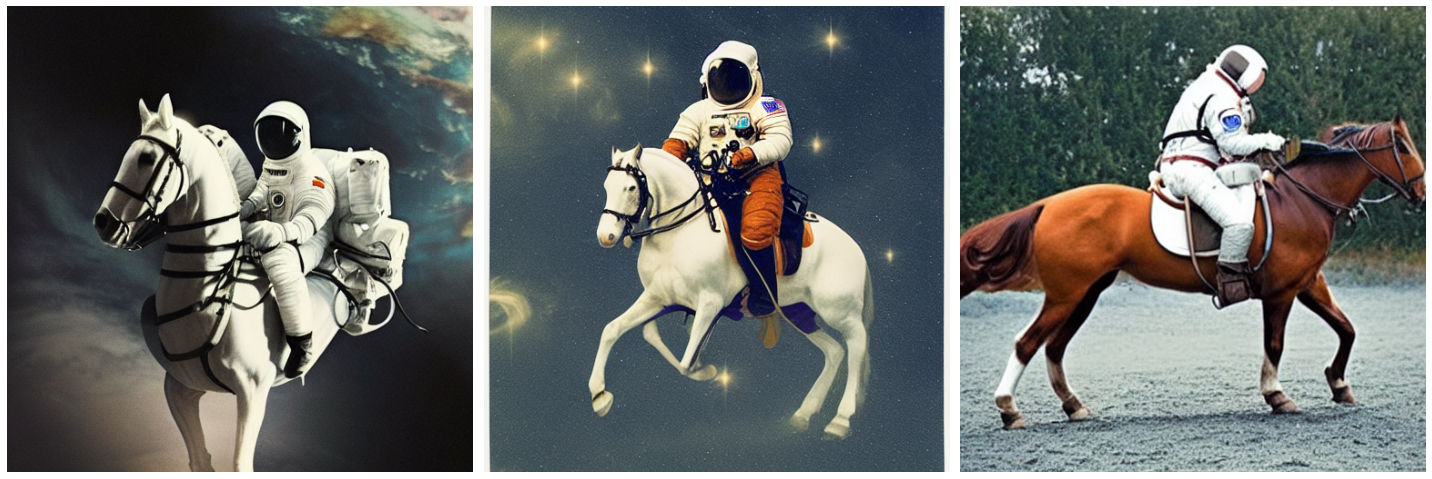

In [6]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)

plot_images(images)

## 한글 -> 영어 번역

In [7]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

translation = translator.translate("펭귄이 곰한테 뽀뽀하는 모습")

translation

'A penguin kisses a bear'

## 함수화

펭귄이 곰한테 뽀뽀하는 모습
A penguin kisses a bear
25/25 [==============================] - 61s 2s/step


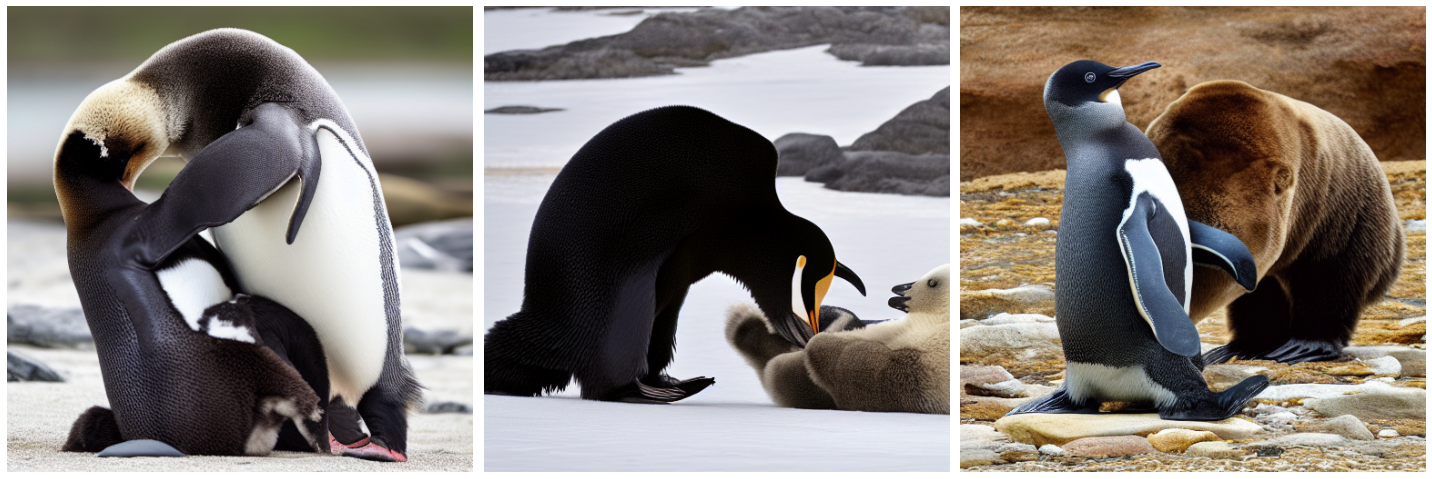

In [ ]:
def generate_images(text, n=3):
    print(text)
    translation = translator.translate(text)
    print(translation)

    images = model.text_to_image(translation, batch_size=n)

    return images

images = generate_images("펭귄이 곰한테 뽀뽀하는 모습")

plot_images(images)

## 그림 생성 앱 만들기

In [9]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import gradio as gr

def inference(text):
    image = generate_images(text, 1).squeeze()
    return image

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/gradio/routes.py", line 322, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 1015, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 833, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.8/dist-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.8/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.8/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-11-b61abbd76790>", line 4, in inference
    image = generate_images(text, 1).squeeze()
NameError: name 'gener